# COURSE: A deep understanding of deep learning
## SECTION: FFN milestone projects
### LECTURE: Project 1: A gratuitously complex adding machine
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [116]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create the training data

In [117]:
# create data

N = 2000

# generate data
data = torch.randint(low=-10,high=11,size=(N,2)).float()

# "labels"
labels = torch.sum(data,axis=1,keepdim=True)

# print the data
for i in range(N):
  print(data[i],labels[i])

tensor([-7.,  1.]) tensor([-6.])
tensor([-1., -6.]) tensor([-7.])
tensor([-2.,  7.]) tensor([5.])
tensor([ 0., -7.]) tensor([-7.])
tensor([10., -7.]) tensor([3.])
tensor([-5., -8.]) tensor([-13.])
tensor([6., 3.]) tensor([9.])
tensor([-5.,  1.]) tensor([-4.])
tensor([9., 6.]) tensor([15.])
tensor([9., 2.]) tensor([11.])
tensor([-5., -3.]) tensor([-8.])
tensor([-10.,  -8.]) tensor([-18.])
tensor([-8.,  3.]) tensor([-5.])
tensor([ 2., 10.]) tensor([12.])
tensor([ 9., -2.]) tensor([7.])
tensor([-3.,  1.]) tensor([-2.])
tensor([ 5., -4.]) tensor([1.])
tensor([-5.,  2.]) tensor([-3.])
tensor([-5., -8.]) tensor([-13.])
tensor([-6., -9.]) tensor([-15.])
tensor([ 4., -1.]) tensor([3.])
tensor([-2., -6.]) tensor([-8.])
tensor([-5., -5.]) tensor([-10.])
tensor([ 2., -4.]) tensor([-2.])
tensor([2., 0.]) tensor([2.])
tensor([-8., -6.]) tensor([-14.])
tensor([-2.,  9.]) tensor([7.])
tensor([-6.,  1.]) tensor([-5.])
tensor([-7.,  4.]) tensor([-3.])
tensor([-5., 10.]) tensor([5.])
tensor([ 8., -5.]) 

tensor([-10.,   7.]) tensor([-3.])
tensor([ 4., -7.]) tensor([-3.])
tensor([-9.,  0.]) tensor([-9.])
tensor([8., 1.]) tensor([9.])
tensor([-5.,  6.]) tensor([1.])
tensor([-2., -5.]) tensor([-7.])
tensor([-10.,   2.]) tensor([-8.])
tensor([ 3., -5.]) tensor([-2.])
tensor([ 6., -6.]) tensor([0.])
tensor([ 6., -4.]) tensor([2.])
tensor([ 3., -6.]) tensor([-3.])
tensor([ 9., -6.]) tensor([3.])
tensor([3., 8.]) tensor([11.])
tensor([8., 3.]) tensor([11.])
tensor([7., 1.]) tensor([8.])
tensor([-10.,   8.]) tensor([-2.])
tensor([-10.,  -9.]) tensor([-19.])
tensor([ 1., -5.]) tensor([-4.])
tensor([3., 9.]) tensor([12.])
tensor([-1., -2.]) tensor([-3.])
tensor([0., 1.]) tensor([1.])
tensor([-6., -1.]) tensor([-7.])
tensor([-4.,  5.]) tensor([1.])
tensor([ 1., -8.]) tensor([-7.])
tensor([2., 1.]) tensor([3.])
tensor([1., 7.]) tensor([8.])
tensor([-3., -5.]) tensor([-8.])
tensor([-6., -9.]) tensor([-15.])
tensor([4., 5.]) tensor([9.])
tensor([-9., -7.]) tensor([-16.])
tensor([ -3., -10.]) tensor(

In [118]:
labels.shape

torch.Size([2000, 1])

# Design the model

In [119]:
# a function that builds the model

def createADDmodel():

  # model architecture
  ADDclassify = nn.Sequential(
      nn.Linear(2,30),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(30,1),  # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
        )

  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(ADDclassify.parameters(),lr=.01)

  # model output
  return ADDclassify,lossfun,optimizer

# Train the model

In [120]:
# a function that trains the model

# a fixed parameter
numepochs = 100

def trainTheModel(ADDmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    numloss = []
    # loop through "minibatches" of N=1
    for num,ans in zip(data,labels):

      # forward pass
      yHat = ADDmodel(num)

      # compute loss
      loss = lossfun(yHat,ans)
      numloss.append(loss.item())

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  
    losses[epochi] = np.mean(numloss)
  
  
  # final forward pass
  with torch.no_grad():
    predictions = ADDmodel(data)
  
  # compute the predictions and report accuracy (is this really different from loss?)
  trainacc = 100*torch.mean( (np.abs(predictions-labels)<1).float() ) # <1 for rounding


  ### now test with new data!
  # create brand new test data
  TESTdata = torch.randint(low=-10,high=11,size=(N,2)).float()
  TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)
  
  # evaluate the model and compute accuracy
  with torch.no_grad():
    predictions = ADDmodel(TESTdata)
  testacc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )
  
  # EOF
  return losses,trainacc,testacc,ADDmodel

In [121]:
# test the model once to make sure it runs

AddingMachine,lossfun,optimizer = createADDmodel()
losses,trainacc,testacc,ADDmodel = trainTheModel(AddingMachine)

# print the results
print(trainacc,testacc)
# losses

tensor(8.5500) tensor(9.3500)


# Run the experiment!

In [122]:
# run the model 10 times to check reproducibility

for i in range(10):

  # create a new 'machine' and train it
  AddingMachine,lossfun,optimizer = createADDmodel()
  _,trainacc,testacc,ADDmodel = trainTheModel(AddingMachine)

  # report accuracy
  print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

Model instance 1, final TRAIN/TEST accuracies: 99.95%, 99.9%
Model instance 2, final TRAIN/TEST accuracies: 100%, 100%
Model instance 3, final TRAIN/TEST accuracies: 99.55%, 99.35%
Model instance 4, final TRAIN/TEST accuracies: 99.95%, 99.8%
Model instance 5, final TRAIN/TEST accuracies: 8.55%, 9.65%
Model instance 6, final TRAIN/TEST accuracies: 100%, 100%
Model instance 7, final TRAIN/TEST accuracies: 97.5%, 97.4%
Model instance 8, final TRAIN/TEST accuracies: 8.55%, 8.2%
Model instance 9, final TRAIN/TEST accuracies: 100%, 100%
Model instance 10, final TRAIN/TEST accuracies: 99.95%, 99.8%


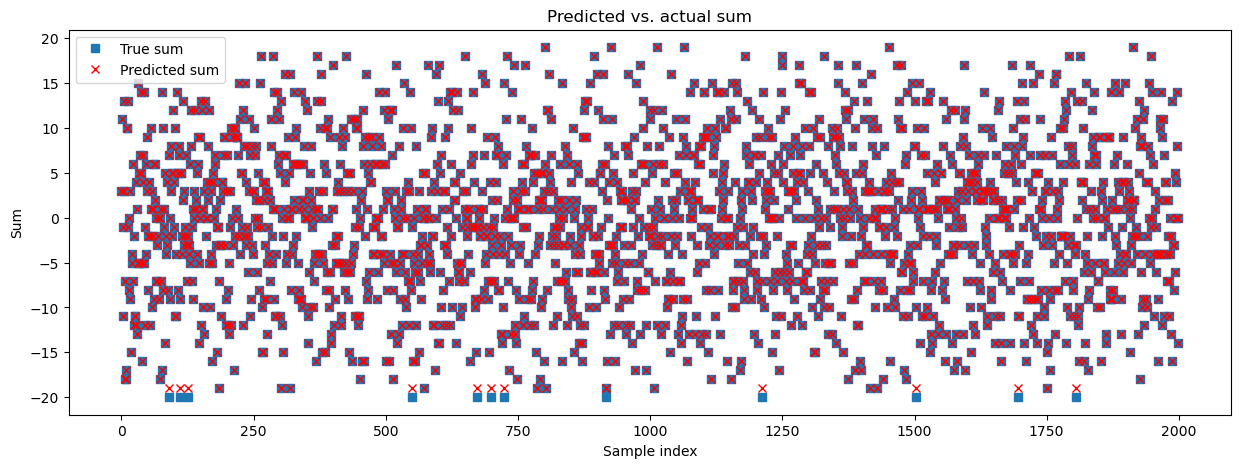

In [123]:
# some plots from the final model

data = torch.randint(low=-10,high=11,size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
  predictions = ADDmodel(data)


# true and predicted values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()

In [124]:
# My COMMENT: Just using a linear model with no non-linearity gives 100% accuracy in all cases.